## Observations and Insights 

In [255]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [256]:
# Checking the number of mice.
total_mouse = len(combined_df["Mouse ID"].unique())
total_mouse

249

In [257]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [258]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_df.loc[combined_df['Mouse ID'] == "g989",:]
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [259]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_clean_df = combined_df[combined_df["Mouse ID"].isin(dup_mouse)==False]
data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [260]:
# Checking the number of mice in the clean DataFrame.
total_mouse_clean = len(data_clean_df["Mouse ID"].unique())
total_mouse_clean

249

## Summary Statistics

In [261]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

stat_data_clean_df = data_clean_df.groupby (["Drug Regimen"])
stat_data_clean_df.count().head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 


drug_regime_mean = round(stat_data_clean_df["Tumor Volume (mm3)"].mean(),2)
drug_regime_median= round(stat_data_clean_df["Tumor Volume (mm3)"].median(),2)
drug_regime_variance = round(stat_data_clean_df["Tumor Volume (mm3)"].var(),2)
drug_regime_stdr_dev = round(stat_data_clean_df["Tumor Volume (mm3)"].std(),2)
regimen_sem = round(data_clean_df["Tumor Volume (mm3)"].sem(),2)

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Mean":drug_regime_mean,
                           "Median":drug_regime_median, 
                           "Variance": drug_regime_variance, 
                           "Standard Deviation": drug_regime_stdr_dev,
                           "SEM": regimen_sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.2
Ceftamin,52.59,51.78,39.29,6.27,0.2
Infubinol,52.88,51.82,43.13,6.57,0.2
Ketapril,55.24,53.70,68.55,8.28,0.2
Naftisol,54.33,52.51,66.17,8.13,0.2
Placebo,54.03,52.29,61.17,7.82,0.2
Propriva,52.32,50.85,42.35,6.51,0.2
Ramicane,40.22,40.67,23.49,4.85,0.2
Stelasyn,54.23,52.43,59.45,7.71,0.2


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_II = round(data_clean_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"],2)
summary_II.head(12)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

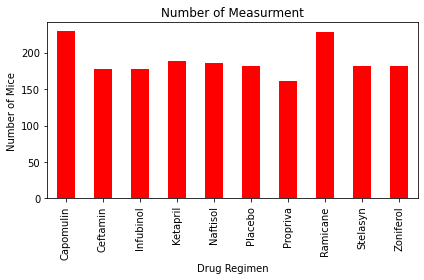

In [262]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measurments = data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = total_measurments.plot.bar(color='r')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Measurment")

plt.savefig("../Images/Number of Measurments.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

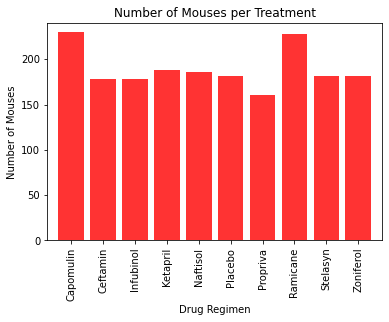

In [263]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

count_mouse = data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

count_mouse

mouse_list =data_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
mouse_list

x_axis = np.arange(len(count_mouse))
fig1, ax1 = plt.subplots()
plt.bar(x_axis, mouse_list, color='r', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mouse_list)+10)

plt.title("Number of Mouses per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouses")

plt.savefig("../Images/Number of Mouses per Treatment.png", bbox_inches = "tight")

In [264]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = data_clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = round((100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum())),2)

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.8
Male,125,50.2


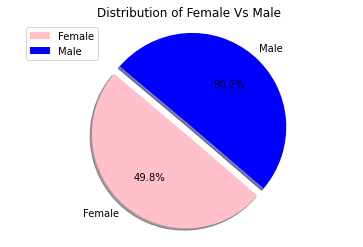

In [265]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["pink", "blue"]
explode = (0.1, 0)
mouse_gender.plot.pie(y='Total Count', colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title("Distribution of Female Vs Male")
plt.ylabel(" ")
plt.axis("equal")

plt.savefig("../Images/Distribution of Female Vs Male.png", bbox_inches = "tight")
plt.show()

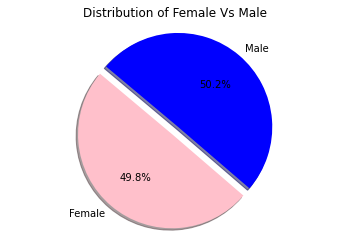

In [266]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)

plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Distribution of Female Vs Male")

plt.axis("equal")

plt.savefig("../Images/Distribution of Female Vs Male Pyplot", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [267]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = data_clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtimepoint_df = pd.merge(max_timepoint , data_clean_df, on=(["Mouse ID","Timepoint"]))
maxtimepoint_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [268]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []
total_drug_regimen = len(drug_regimen)
quartile = [0,1,2,3]
lowerq = [0,1,2,3]
upperq = [0,1,2,3]
iqr = [0,1,2,3]
lower_bound = [0,1,2,3]
upper_bound = [0,1,2,3]

# Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in drug_regimen:
    drug_regimen_value = maxtimepoint_df.loc[maxtimepoint_df["Drug Regimen"] == drug]
    tumor = drug_regimen_value['Tumor Volume (mm3)']
    tumor_volume.append(tumor)

for i in range(total_drug_regimen):
    quartile[i] = tumor_volume[i].quantile([.25,.5,.75])
    lowerq[i] = quartile[i][0.25]
    upperq[i] = quartile[i][0.75]
    iqr[i] = upperq[i]-lowerq[i]
    
    print(f"{drug_regimen[i]} treatment lower quartile is: {lowerq[i]}")
    print(f"{drug_regimen[i]} treatment upper quartile is: {upperq[i]}")
    print(f"{drug_regimen[i]} treatment interquartile range is: {iqr[i]}")

    lower_bound[i] = lowerq[i] - (1.5*IQR[i])
    upper_bound[i] = upperq[i] + (1.5*IQR[i])
    
    print(f"{drug_regimen[i]} treatment Values below {lower_bound[i]} could be outliers.")
    print(f"{drug_regimen[i]} treatment Values above {upper_bound[i]} could be outliers.")
    print("")

Capomulin treatment lower quartile is: 32.37735684
Capomulin treatment upper quartile is: 40.1592203
Capomulin treatment interquartile range is: 7.781863460000004
Capomulin treatment Values below 32.37735684 could be outliers.
Capomulin treatment Values above 40.1592203 could be outliers.

Ramicane treatment lower quartile is: 31.56046955
Ramicane treatment upper quartile is: 40.65900627
Ramicane treatment interquartile range is: 9.098536719999998
Ramicane treatment Values below 30.06046955 could be outliers.
Ramicane treatment Values above 42.15900627 could be outliers.

Infubinol treatment lower quartile is: 54.04860769
Infubinol treatment upper quartile is: 65.52574285
Infubinol treatment interquartile range is: 11.477135160000003
Infubinol treatment Values below 51.04860769 could be outliers.
Infubinol treatment Values above 68.52574285 could be outliers.

Ceftamin treatment lower quartile is: 48.72207785
Ceftamin treatment upper quartile is: 64.29983003
Ceftamin treatment interqua

NameError: name 'boxplot' is not defined

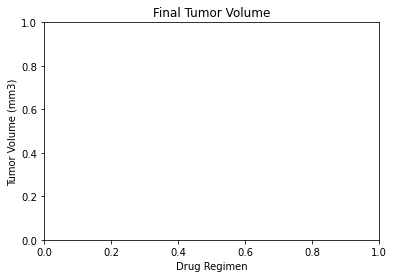

In [287]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


plt.title('Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Drug Regimen")
boxplot(tumor_volume, labels = drug_regimen)
plt.savefig("../Images/Final Tumor Volume", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [269]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
line_plot.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


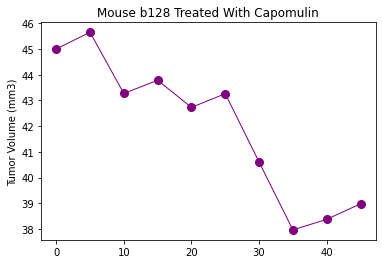

In [288]:
x_axis = line_plot["Timepoint"]
y_axis = line_plot["Tumor Volume (mm3)"]

plt.title("Mouse b128 Treated With Capomulin")
plt.plot(x_axis, y_axis, linewidth=1, markersize=8,marker="o",color="purple")
("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


plt.savefig("../Images/Mouse b128 Treated With Capomulin", bbox_inches = "tight")
plt.show()

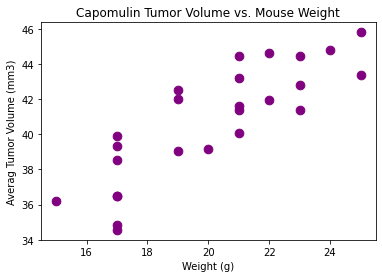

In [279]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_average_volume =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(capomulin_average_volume['Weight (g)'],capomulin_average_volume["Tumor Volume (mm3)"],s=75, color="purple")
plt.title("Capomulin Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")


plt.savefig("../Images/Capomulin Tumor Volume vs. Mouse Weight.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [273]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(capomulin_average_volume["Weight (g)"],capomulin_average_volume["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.7088568047708717


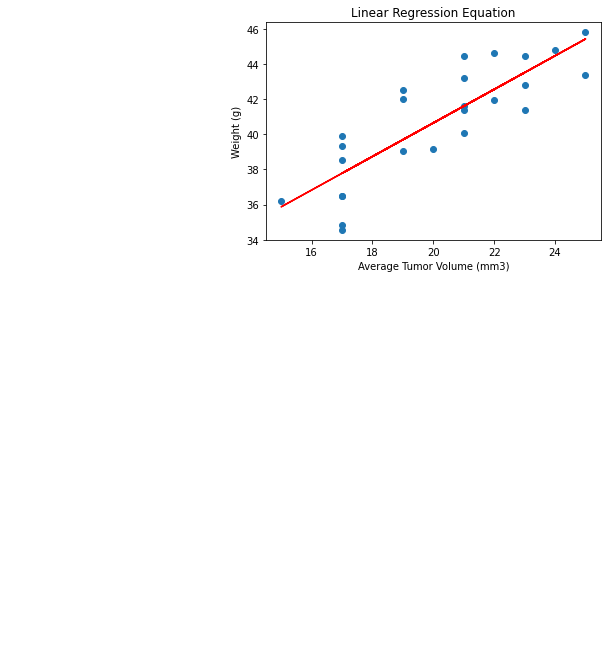

In [275]:
x_values = capomulin_average_volume["Weight (g)"]
y_values = capomulin_average_volume["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Linear Regression Equation")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Images/Linear Regression.png", bbox_inches = "tight")
plt.show()